In [448]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [449]:
#Loading the dataset
ds=pd.read_csv("E:/Datatrained/Evaluation/evaluation/Restaurant/Participants_Data_Final/Data_Train.csv")
ds

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [450]:
#Checking datatypes of all the columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB


In [451]:
#Check the number of rows and columns
ds.shape

(12690, 9)

In [452]:
#Observing mean,min and max values for all integer columns
ds.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [453]:
#checking the count of each city
ds['CITY'].value_counts()

Chennai                                                           2174
Bangalore                                                         2149
Hyderabad                                                         1819
Mumbai                                                            1722
New Delhi                                                         1321
Kochi                                                             1279
Gurgaon                                                            379
Secunderabad                                                       310
Noida                                                              211
Navi Mumbai                                                        165
Ghaziabad                                                          102
Thane                                                               97
Faridabad                                                           79
Bandra West                                                         69
Thane 

In [454]:
#Checking for the null values
ds.isnull().sum()

#We can observe there are null values in City,Locality,Rating and votes

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [455]:
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [456]:
#Dropping row no 13 because it has "-" in Row columns
ds.drop(ds.index[13])

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [457]:
#converting rating to float type so that we can find its mean

#ds['RATING'] = pd.to_numeric(ds['RATING'])
ds['RATING'] = pd.to_numeric(ds['RATING'], errors='coerce')

In [458]:
#removing 'votes' from VOTES column so we can count mean for null values
ds['VOTES'] = (ds['VOTES'].str.strip('votes'))
ds['VOTES'] = pd.to_numeric(ds['VOTES'], errors='coerce')
ds

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550.0,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509.0,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612.0,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101.0,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219.0,200


In [459]:
#Removing the null values
ds['CITY'].fillna(ds['CITY'].mode()[0], inplace = True)
ds['LOCALITY'].fillna(ds['LOCALITY'].mode()[0], inplace = True)
ds['VOTES'].fillna(ds['VOTES'].mean(), inplace = True)
ds['RATING'].fillna(ds['RATING'].mean(), inplace = True)


We will use the mode for object type columns and mean for numerical columns

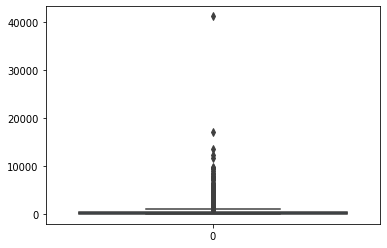

In [460]:
#Checking the outliers using the boxplot
sn.boxplot(data=ds['VOTES'])
plt.show()


There are many outliers in VOTES columns. We will try to remove them using zscore

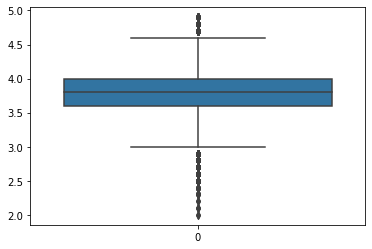

In [461]:
#Checking the outliers using the boxplot
sn.boxplot(data=ds['RATING'])
plt.show()


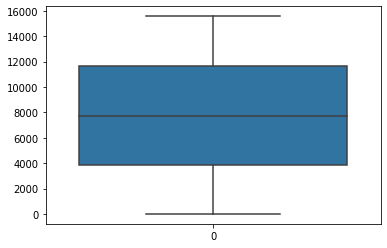

In [462]:
#Checking the outliers using the boxplot
sn.boxplot(data=ds['RESTAURANT_ID'])
plt.show()


#ds['TIME'].fillna(ds['TIME'].mean(), inplace = True)

ds['TIME'] = ds['TIME'].str.replace(r'Closed \(.*?\)','')

In [463]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(ds[c].values)) 
    ds[c] = lbl.transform(list(ds[c].values))

In [464]:
#Checking the null values
ds.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [465]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null int64
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null int64
TIME             12690 non-null int64
CITY             12690 non-null int64
LOCALITY         12690 non-null int64
RATING           12690 non-null float64
VOTES            12690 non-null float64
COST             12690 non-null int64
dtypes: float64(2), int64(7)
memory usage: 892.3 KB


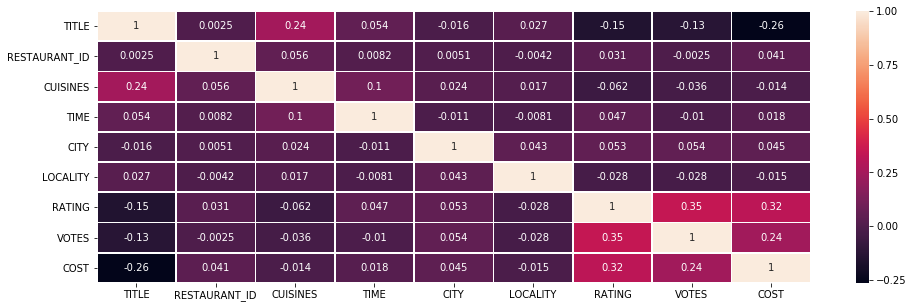

In [466]:
#Checking correlation using the heatmap
corr=ds.corr()
plt.figure(figsize=(16,5))
sn.heatmap(corr,annot=True,linewidths=.8)
plt.show()


In [467]:
#Remving the outliers using zscore method
ds_n=ds
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ds_n))
print(z)

threshold = 3
print(np.where(z > 3))

ds_n = ds_n[(z < 3).all(axis=1)]

[[0.86888688 0.37269233 0.32540837 ... 0.46184081 0.45735622 0.86884552]
 [0.80783894 1.20737672 1.61638078 ... 1.03237172 0.48105544 1.34733058]
 [0.86888688 0.70057234 0.61526483 ... 0.03623004 0.24281588 0.23086546]
 ...
 [0.35207201 0.74896628 0.12224961 ... 0.53430088 0.23989988 1.02834054]
 [0.86888688 0.36076439 1.055448   ... 0.71087623 0.47856079 0.40711461]
 [0.86888688 0.29505519 0.59034881 ... 0.95991165 0.32596548 0.08812458]]
(array([   84,   159,   186,   196,   208,   293,   303,   304,   308,
         337,   344,   354,   379,   422,   431,   469,   502,   510,
         563,   599,   672,   731,   775,   796,   839,   852,   855,
         872,   913,   966,   967,   973,  1008,  1020,  1034,  1038,
        1132,  1133,  1147,  1151,  1193,  1244,  1288,  1345,  1346,
        1395,  1467,  1470,  1475,  1476,  1522,  1540,  1594,  1617,
        1632,  1657,  1681,  1685,  1759,  1773,  1778,  1816,  1828,
        1850,  1878,  1884,  1916,  1930,  1931,  1973,  2068,  2

In [468]:
# we cannot use Zscore to remove outlier as it is removing all the rows.
print("old",ds.shape)
print("new",ds_n.shape)

old (12690, 9)
new (12202, 9)


In [469]:
#creating target variable and seperating data into X and Y
x=ds_n.drop("COST",axis=1)
y=ds_n['COST']

#Spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [470]:
#Scling data using standardscalar method
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

In [471]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(20,300):
    x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

        
print(f"best accuracy {accu*100} found on randome_state {best_rstate}")

best accuracy 29.69777499934668 found on randome_state 47


In [472]:
#Random Forest Regressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(x_train,y_train)
y_pred=rd.predict(x_test)
r2score=r2_score(y_test,y_pred)
print(f"Accuracu is {r2score*100}")

C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracu is 66.06807927458512


In [473]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=3,p=2)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print(f"Accuracu is {score*100}")

Accuracu is 29.259112286022038


In [474]:
#We will try to improve performance by hypertuning the KNN model
from sklearn.model_selection import GridSearchCV 
parameter = {'leaf_size':[1,3,5,7,9,11,13,15],
            'n_neighbors':[2,4,6,8,10,12,14],
             'p':[1,2]
            }

grid = GridSearchCV(model, parameter, refit = True, verbose = 3) 

grid.fit(x_train, y_train)

y_pred=grid.predict(x_test)
score=r2_score(y_test,y_pred)
print(f"Accuracu is {score*100}")

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] leaf_size=1, n_neighbors=2, p=1 .................................


C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.286, total=   0.3s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.326, total=   0.3s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.299, total=   0.3s
[CV] leaf_size=1, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=2, score=0.215, total=   0.6s
[CV] leaf_size=1, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=2, score=0.224, total=   0.6s
[CV] leaf_size=1, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=2, score=0.213, total=   0.6s
[CV] leaf_size=1, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=1, score=0.423, total=   0.4s
[CV] leaf_size=1, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=1, score=0.403, total=   0.4s
[CV] leaf_size=1, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=1, score=0.406, total=   0.4s
[CV] leaf_size=1, n_neighbors=4, p=2 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  2.7min finished


Accuracu is 42.86303925564394


In [475]:
#We will try to improve performance of our best model using GridSearchCV
from sklearn.model_selection import GridSearchCV 
parameter = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
             }

grid = GridSearchCV(rd, parameter, refit = True, verbose = 3) 

grid.fit(x_train, y_train)

y_pred=grid.predict(x_test)
score=r2_score(y_test,y_pred)
print(f"Accuracu is {score*100}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=0.543, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..


C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=0.551, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=0.540, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=0.531, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=0.538, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=0.550, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=7 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=7, score=0.541, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=7 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=7, score=0.547, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=7 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=7, score=0.544, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimato

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   46.6s finished


Accuracu is 64.85485700246774


We have tried  Linear regression,KNN and Random forest on our train dataset.
We are getting best result with Random forest hence we have used Random forest for gridsearch cv and hyper tune it to increase our score.

After hyperparamaeter tunning our score has increased from 62% to 65%.

In [476]:
#creating Pickle file
import pickle
filename = 'foodcost.pkl'
pickle.dump(grid,open(filename, 'wb'))

We have created our model.
Now we will load the test dataset and we will also do preprocessing and EDA on test dataset.

In [478]:
#Loading the test dataset
test_ds=pd.read_csv("E:/Datatrained/Evaluation/evaluation/Restaurant/Participants_Data_Final/Data_Test.csv")
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,3.6,49.0,1200
1,33,13198,289,1885,67,1046,4.2,30.0,1500
2,31,10915,2976,661,67,1101,3.8,221.0,800
3,95,6346,4130,275,222,136,4.1,24.0,800
4,50,15387,1766,615,222,620,3.8,165.0,300


In [479]:

#finding if there are any null values in test data
test_ds.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [480]:
#Checking the datatype of each columns
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.5+ KB


In [481]:
#Observing mean,min and max values for all integer columns
test_ds.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [482]:
test_ds.shape

(4231, 8)

In [483]:
#ds['RATING'] = pd.to_numeric(ds['RATING'])
test_ds['RATING'] = pd.to_numeric(test_ds['RATING'], errors='coerce')

In [484]:
#removing 'votes' from VOTES column so we can count mean for null values
test_ds['VOTES'] = (test_ds['VOTES'].str.strip('votes'))
test_ds['VOTES'] = pd.to_numeric(test_ds['VOTES'], errors='coerce')
test_ds

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36.0
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NaN,NaN
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.0,703.0
8,None,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475.0
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6.0


In [485]:
#Replacing the null values for Test dataset
test_ds['CITY'].fillna(test_ds['CITY'].mode()[0], inplace = True)
test_ds['LOCALITY'].fillna(test_ds['LOCALITY'].mode()[0], inplace = True)
test_ds['VOTES'].fillna(test_ds['VOTES'].mean(), inplace = True)
test_ds['RATING'].fillna(test_ds['RATING'].mean(), inplace = True)


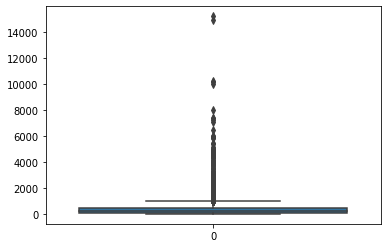

In [486]:
#Checking outliers in test dataset Votes column
sn.boxplot(data=test_ds['VOTES'])
plt.show()


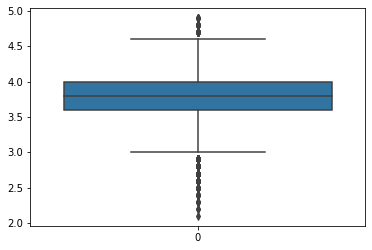

In [487]:
#checking outliers in Test dataset
sn.boxplot(data=test_ds['RATING'])
plt.show()


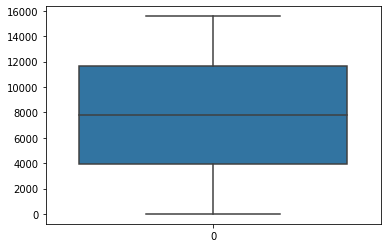

In [488]:
sn.boxplot(data=test_ds['RESTAURANT_ID'])
plt.show()


In [489]:
test_ds

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.300000,564.000000
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.200000,61.000000
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.800000,350.000000
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.800000,1445.000000
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.600000,23.000000
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.700000,36.000000
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,3.781536,429.769391
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.000000,703.000000
8,None,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.400000,475.000000
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.200000,6.000000


In [490]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test_ds[c].values)) 
    test_ds[c] = lbl.transform(list(test_ds[c].values))

In [491]:
fitted_model=pickle.load(open("foodcost.pkl","rb"))

In [492]:
#our model
fitted_model

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True], 'max_dept

In [493]:
#giving our test data to model for prediction
predictions=fitted_model.predict(test_ds)

In [494]:
#Our predictions
print("Our predictions are :",predictions)

Our predictions are : [480.76923077 480.76923077 480.76923077 ... 480.76923077 480.76923077
 480.76923077]
